In [1]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','INTC','MSFT','CSCO']#,'AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
features=[  2,   5,   3 , 37 ,  6 ,  7 ,  0 ,  8  ,59 ,  9 , 10 , 11 , 12  ,13   ,1 , 44  ,42,  60,
  46 , 21 , 78,  45 , 80 , 82 , 84 , 86 , 88 , 90 , 92,  23,  71,  41, 110 , 40, 108,  39,
  62, 106 , 38, 109]
prices=list()
for file in files:
   
    priceData =  pd.read_csv('/home/andrea/Desktop/NLFF/YahooData/'+file+'.csv')
    priceData=priceData.drop(['Adj Close'],axis=1)
   
    
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    stock = StockDataFrame.retype(priceData)
    
    stock.get(string)
    price = stock
    
    print(price.iloc[:,features])
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price.iloc[:,features])

                   low  close_2_sma       close      middle  close_4_sma  \
date                                                                       
1980-12-12    0.513393     0.513393    0.513393    0.514137     0.513393   
1980-12-15    0.486607     0.500000    0.486607    0.487351     0.500000   
1980-12-16    0.450893     0.468750    0.450893    0.451637     0.483631   
1980-12-17    0.462054     0.456473    0.462054    0.462798     0.478237   
1980-12-18    0.475446     0.468750    0.475446    0.476190     0.468750   
1980-12-19    0.504464     0.489955    0.504464    0.505208     0.473214   
1980-12-22    0.529018     0.516741    0.529018    0.529762     0.492745   
1980-12-23    0.551339     0.540179    0.551339    0.552083     0.515067   
1980-12-24    0.580357     0.565848    0.580357    0.581101     0.541295   
1980-12-26    0.633929     0.607143    0.633929    0.634673     0.573661   
1980-12-29    0.642857     0.638393    0.642857    0.643601     0.602121   
1980-12-30  

/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                  low  close_2_sma      close     middle  close_4_sma  \
date                                                                    
1980-03-17   0.325521     0.325521   0.325521   0.327257     0.325521   
1980-03-18   0.322917     0.324219   0.322917   0.324653     0.324219   
1980-03-19   0.330729     0.326823   0.330729   0.332465     0.326389   
1980-03-20   0.329427     0.330078   0.329427   0.331163     0.327149   
1980-03-21   0.317708     0.323568   0.317708   0.319444     0.325195   
1980-03-24   0.311198     0.314453   0.311198   0.312934     0.322266   
1980-03-25   0.312500     0.311849   0.312500   0.314236     0.317708   
1980-03-26   0.309896     0.311198   0.309896   0.311632     0.312826   
1980-03-27   0.299479     0.304688   0.299479   0.301215     0.308268   
1980-03-28   0.311198     0.305339   0.311198   0.312934     0.308268   
1980-03-31   0.321615     0.316407   0.321615   0.323351     0.310547   
1980-04-01   0.322917     0.322266   0.322917   0.3

                   low  close_2_sma       close      middle  close_4_sma  \
date                                                                       
1986-03-13    0.088542     0.097222    0.097222    0.095776     0.097222   
1986-03-14    0.097222     0.098958    0.100694    0.100116     0.098958   
1986-03-17    0.100694     0.101563    0.102431    0.102141     0.100116   
1986-03-18    0.098958     0.101129    0.099826    0.100694     0.100043   
1986-03-19    0.097222     0.098958    0.098090    0.098669     0.100260   
1986-03-20    0.094618     0.096788    0.095486    0.096065     0.098958   
1986-03-21    0.091146     0.094184    0.092882    0.093750     0.096571   
1986-03-24    0.089410     0.091580    0.090278    0.090857     0.094184   
1986-03-25    0.089410     0.091146    0.092014    0.091146     0.092665   
1986-03-26    0.091146     0.093316    0.094618    0.093750     0.092448   
1986-03-27    0.094618     0.095486    0.096354    0.095775     0.093316   
1986-03-31  

                  low  close_2_sma      close     middle  close_4_sma  \
date                                                                    
1990-02-16   0.073785     0.077257   0.077257   0.076968     0.077257   
1990-02-20   0.074653     0.078559   0.079861   0.078125     0.078559   
1990-02-21   0.075521     0.078993   0.078125   0.077546     0.078414   
1990-02-22   0.078993     0.078559   0.078993   0.079861     0.078559   
1990-02-23   0.078125     0.078776   0.078559   0.078848     0.078884   
1990-02-26   0.076389     0.077474   0.076389   0.077546     0.078016   
1990-02-27   0.076389     0.077257   0.078125   0.077980     0.078016   
1990-02-28   0.078125     0.079427   0.080729   0.080440     0.078450   
1990-03-01   0.079861     0.080295   0.079861   0.080440     0.078776   
1990-03-02   0.079861     0.080295   0.080729   0.080729     0.079861   
1990-03-05   0.079861     0.080295   0.079861   0.080440     0.080295   
1990-03-06   0.078993     0.079861   0.079861   0.0

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

Working on... AAPL
0.003981071705534973
Window: 0
[[925   0]
 [966   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.48915917503966155
10000.0
Window: 2
[[ 36 824]
 [ 75 956]]
F1,score 0.680184987548915
Accuracy: 0.5245901639344263
10000.0
Window: 5
[[559 276]
 [667 388]]
F1,score 0.4514252472367656
Accuracy: 0.5010582010582011
10000.0
Window: 10
[[   5  791]
 [  14 1079]]
F1,score 0.7283158960512993
Accuracy: 0.5738485971413446
1000.0
Window: 15
[[   0  784]
 [   0 1104]]
F1,score 0.7379679144385026
Accuracy: 0.5847457627118644
63.0957344480193
Window: 30
[[   2  730]
 [  20 1133]]
F1,score 0.7513262599469497
Accuracy: 0.6021220159151194
0.15848931924611143
Window: 60
[[   0  572]
 [   0 1307]]
F1,score 0.8204645323289391
Accuracy: 0.6955827567855242
251.18864315095797
Window: 120
[[372  66]
 [879 550]]
F1,score 0.5378973105134475
Accuracy: 0.4938403856454205
[0, 0, 0, 0, 0, 0, 0, 0]
[0.48915917503966155, 0.5245901639344263, 0.5010582010582011, 0.5738485971413446, 0.5847457627118644, 0.6021220159151194, 0.6955827567855242, 0.4938403856454205]
accuracy
accuracy


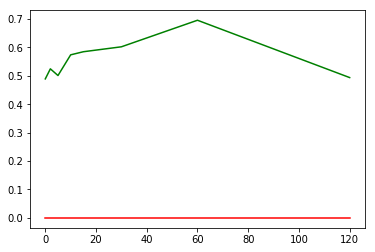

Working on... INTC
251.18864315095797
Window: 0
[[739 147]
 [848 195]]
F1,score 0.2815884476534296
Accuracy: 0.48418869880767235
6.309573444801943
Window: 2
[[769 100]
 [906 153]]
F1,score 0.23323170731707316
Accuracy: 0.4782157676348548
0.15848931924611143
Window: 5
[[ 815   40]
 [1031   42]]
F1,score 0.07272727272727274
Accuracy: 0.44450207468879666
0.0001
Window: 10
[[ 861    4]
 [1062    0]]
F1,score 0.0
Accuracy: 0.44680851063829785
0.15848931924611143
Window: 15
[[693 133]
 [810 290]]
F1,score 0.3808273145108339
Accuracy: 0.5103842159916926
6.309573444801943
Window: 30
[[ 765    0]
 [1158    0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.39781591263650545
0.003981071705534973
Window: 60
[[669  49]
 [948 251]]
F1,score 0.33488992661774514
Accuracy: 0.47991653625456443
0.0001
Window: 120
[[524  50]
 [958 373]]
F1,score 0.4253135689851768
Accuracy: 0.47086614173228347
[0, 0, 0, 0, 0, 0, 0, 0]
[0.48418869880767235, 0.4782157676348548, 0.44450207468879666, 0.44680851063829785, 0.5103842159916926, 0.39781591263650545, 0.47991653625456443, 0.47086614173228347]
accuracy
accuracy


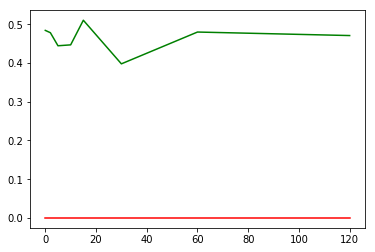

Working on... MSFT


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


6.309573444801943
Window: 0
[[285 491]
 [297 553]]
F1,score 0.5839493136219641
Accuracy: 0.5153751537515375
63.0957344480193
Window: 2
[[652  62]
 [819  93]]
F1,score 0.17432052483598875
Accuracy: 0.45817958179581797
10000.0
Window: 5
[[408 241]
 [519 457]]
F1,score 0.5459976105137396
Accuracy: 0.5323076923076923
63.0957344480193
Window: 10
[[211 415]
 [291 707]]
F1,score 0.6669811320754717
Accuracy: 0.5652709359605911
0.15848931924611143
Window: 15
[[429 140]
 [747 307]]
F1,score 0.4090606262491672
Accuracy: 0.4534812076401725
15.848931924611133
Window: 30
[[466  49]
 [938 167]]
F1,score 0.2528387585162755
Accuracy: 0.3907407407407407
15.848931924611133
Window: 60
[[272 163]
 [793 386]]
F1,score 0.4467592592592593
Accuracy: 0.4076827757125155
3.9810717055349722
Window: 120
[[ 339   18]
 [1221   24]]
F1,score 0.037296037296037296
Accuracy: 0.22659176029962547
[0, 0, 0, 0, 0, 0, 0, 0]
[0.5153751537515375, 0.45817958179581797, 0.5323076923076923, 0.5652709359605911, 0.4534812076401725, 0

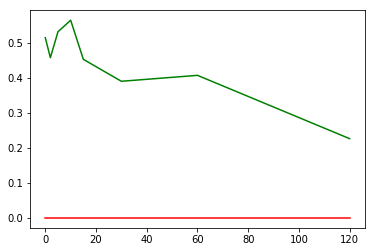

Working on... CSCO
10000.0
Window: 0
[[253 381]
 [307 486]]
F1,score 0.5855421686746988
Accuracy: 0.5178696566222845
251.18864315095823
Window: 2
[[252 376]
 [320 479]]
F1,score 0.5792019347037486
Accuracy: 0.5122634898388227
10000.0
Window: 5
[[451 144]
 [600 231]]
F1,score 0.38308457711442784
Accuracy: 0.4782608695652174
1000.0
Window: 10
[[296 310]
 [418 401]]
F1,score 0.5241830065359477
Accuracy: 0.48912280701754385
63.0957344480193
Window: 15
[[592   0]
 [832   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.4157303370786517
251.18864315095823
Window: 30
[[555   0]
 [866   0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.39057002111189304
63.0957344480193
Window: 60
[[480   1]
 [933   1]]
F1,score 0.002136752136752137
Accuracy: 0.3399293286219081
1.0
Window: 120
[[ 331    0]
 [1072    0]]


/home/andrea/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1,score 0.0
Accuracy: 0.2359230220955096
[0, 0, 0, 0, 0, 0, 0, 0]
[0.5178696566222845, 0.5122634898388227, 0.4782608695652174, 0.48912280701754385, 0.4157303370786517, 0.39057002111189304, 0.3399293286219081, 0.2359230220955096]
accuracy
accuracy


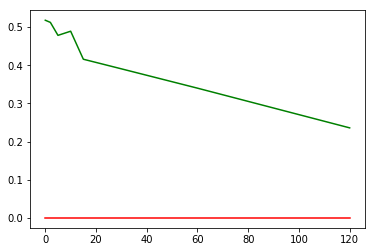

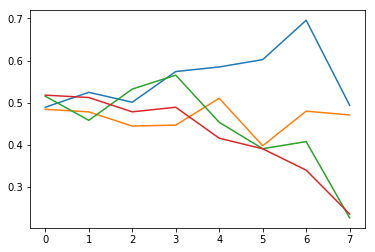

In [3]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[0,2,5,10,15,30,60,120]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,6)),np.logspace(-4,4,6)))
        gspace=np.logspace(-5,3,6)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g)
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                        #print('unable to balance')
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(kernel='rbf',C=maxc,gamma=maxg)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [ ]:
tempacc=accstocksresults

In [ ]:
import operator
t=[0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    t=np.add(t,tempacc[i])

print(t/len(tempacc))


In [ ]:
plt.plot(trendwindowtime,t/len(tempacc))
#normalized=normalize((b/len(tempbalance)).reshape(1, -1),axis=0,norm='max')

plt.show()

In [ ]:
adbe=[0.5550595238095238, 0.5707898658718331, 0.5782414307004471, 0.6104477611940299, 0.6382660687593423, 0.6551724137931034, 0.6786786786786787, 0.6927710843373494, 0.7049924357034796, 0.6904400606980273, 0.7114503816793893, 0.7208588957055214, 0.7476923076923077, 0.8052550231839258, 0.8291925465838509, 0.8390625, 0.8131868131868132, 0.8280757097791798, 0.8510301109350238, 0.8837579617834395, 0.9181380417335474, 0.9258064516129032, 0.9950980392156863, 0.9933554817275747, 1.0]
aapl=[0.5213675213675214, 0.5327635327635327, 0.5242165242165242, 0.5278174037089871, 0.5228571428571429, 0.5444126074498568, 0.5589080459770115, 0.5662824207492796, 0.5433526011560693, 0.5130434782608696, 0.5007299270072992, 0.5226939970717424, 0.5338235294117647, 0.5221238938053098, 0.47703703703703704, 0.4157973174366617, 0.4041916167664671, 0.44511278195488724, 0.48338368580060426, 0.5128983308042488, 0.6131498470948012, 0.6236559139784946, 0.6003110419906688, 0.627172195892575, 0.5826645264847512]
adi=[0.5095320623916811, 0.512998266897747, 0.5285961871750433, 0.5052083333333334, 0.49043478260869566, 0.46596858638743455, 0.46760070052539404, 0.507908611599297, 0.5520282186948854, 0.5415929203539823, 0.5517857142857143, 0.5448028673835126, 0.5171171171171172, 0.49547920433996384, 0.4581818181818182, 0.46886446886446886, 0.48250460405156537, 0.5462962962962963, 0.5493482309124768, 0.5749063670411985, 0.5255198487712666, 0.5741444866920152, 0.6061776061776062, 0.6968503937007874, 0.5341365461847389]
googl=[0.484472049689441, 0.5015527950310559, 0.5085536547433903, 0.5062305295950156, 0.5335413416536662, 0.534375, 0.5564263322884012, 0.5770440251572327, 0.5497630331753555, 0.5641838351822503, 0.6156299840510366, 0.5961538461538461, 0.567524115755627, 0.5250403877221325, 0.4707792207792208, 0.42810457516339867, 0.43349753694581283, 0.43234323432343236, 0.4427860696517413, 0.44666666666666666, 0.44537815126050423, 0.49493243243243246, 0.6386986301369864, 0.6167247386759582, 0.6382978723404256]
results=np.add(aapl,adbe)
results=np.add(results,adi)
results=np.add(results,googl)
tot=results/4
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
print(tot)
plt.plot(trendwindowtime,tot)
plt.show()